In [1]:
import requests
import time
import datetime
def query_latency(proxy):
    if proxy == "proxy1":
        latency_endpoint = 'http://145.100.135.43:6088/latency'
    elif proxy == "proxy2":
        latency_endpoint = 'http://145.100.135.43:6089/latency'
    elif proxy == "proxy3":
        latency_endpoint = 'http://145.100.135.43:6090/latency'
    elif proxy == "proxy4":
        latency_endpoint = 'http://145.100.135.43:6091/latency'
    elif proxy == "proxy5":
        latency_endpoint = 'http://145.100.135.43:6092/latency'
    elif proxy == "proxy0":
        latency_endpoint = 'http://145.100.135.43:6099/latency'       
    response = requests.get(latency_endpoint)
    results = response.json()
    if results:
        return results
    else:
        return float('NaN')

In [2]:
#u = "EHR:1C:E-F-D"
#G_req="G_req2"

import time
def latency_collector(queries, proxy, a):

    for q in range(queries):
        with open(proxy+'latency.csv', 'a') as f:     
            b = datetime.datetime.now()
            c = b - a
            latency = query_latency(proxy)
            f.write('{},{}'.format(c.seconds, latency) + '\n')
            time.sleep(5)
    a = datetime.datetime.now()
    return a

#latency_collector(G_req, 10, u, proxy)

In [70]:
def latency_mean(directory):
    import numpy as np
    import csv
    readdata = csv.reader(open(directory, 'r'))
    data = []
    for row in readdata:
        data.append(row)
        #incase you have a header/title in the first row of your csv file, do the next line else skip it
    data.pop(0) 
    q1 = []  
    for i in range(len(data)):
        q1.append(float(data[i][1]))
    
    print ('Mean of your_column_number :            ', (np.mean(q1)))
    return (np.mean(q1))
latency_mean("./latency/proxy0latency.csv")

Mean of your_column_number :             0.495516015311419


0.495516015311419

In [3]:
import threading
class ThreadWithResult(threading.Thread):
    def __init__(self, group=None, target=None, name=None, args=(), kwargs={}, *, daemon=None):
        def function():
            self.result = target(*args, **kwargs)
        super().__init__(group=group, target=function, name=name, daemon=daemon)

threads = list()
proxies=["proxy1", "proxy0", "proxy4"] #, "proxy2", "proxy3", "proxy4", "proxy5"]
a = datetime.datetime.now()
for cl in range(len(proxies)): #go over proxies
        i = proxies[cl]
        x = ThreadWithResult(target=latency_collector, args=(10, i, a))
        x.daemon = True
        threads.append(x)
        x.start()
for x in threads:
    x.join()
#    a= x.result
###threads = list()
###proxies=["proxy1", "proxy0", "proxy2"]#, "proxy3", "proxy4", "proxy5"]
###for cl in range(len(proxies)): #go over proxies
###        i = proxies[cl]
##        x = ThreadWithResult(target=latency_collector, args=(10, i, a))
###        x.daemon = True
###        threads.append(x)
###        x.start()
###for x in threads:
###    x.join()
#    a= x.result
####proxies=["proxy1", "proxy0", "proxy2"]#, "proxy3", "proxy4", "proxy5"]
##for cl in range(len(proxies)): #go over proxies
###        i = proxies[cl]
###        x = ThreadWithResult(target=latency_collector, args=(10, i, a))
###        x.daemon = True
###        threads.append(x)
###        x.start()
###for x in threads:
###    x.join()
#    a= x.result
###proxies=["proxy1", "proxy0", "proxy2", "proxy3"]#, "proxy4", "proxy5"]
###for cl in range(len(proxies)): #go over proxies
###        i = proxies[cl]
###        x = ThreadWithResult(target=latency_collector, args=(10, i, a))
###        x.daemon = True
###        threads.append(x)
###        x.start()
##for x in threads:
###    x.join()
#    a= x.result
###proxies=["proxy1", "proxy0", "proxy2", "proxy3", "proxy4"]#, "proxy5"]
###for cl in range(len(proxies)): #go over proxies
###        i = proxies[cl]
###        x = ThreadWithResult(target=latency_collector, args=(10, i, a))
###        x.daemon = True
###        threads.append(x)
###        x.start()
###for x in threads:
##    x.join()
#    a= x.result
    
###proxies=["proxy1", "proxy0", "proxy2", "proxy3", "proxy4", "proxy5"]
###for cl in range(len(proxies)): #go over proxies
##        i = proxies[cl]
###        x = ThreadWithResult(target=latency_collector, args=(10, i, a))
##        x.daemon = True
##        threads.append(x)
##        x.start()
##for x in threads:
##    x.join()
#    a= x.result    


Mean of your_column_number :             0.49994941134201853
Mean of your_column_number :             0.516357631518923
Mean of your_column_number :             0.5041403308206674
Mean of your_column_number :             0.4989065982527652
Mean of your_column_number :             0.495516015311419
Mean of your_column_number :             0.5122545030381944


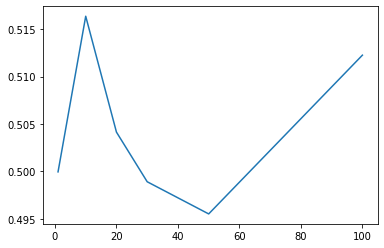

In [75]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
### Set your path to the folder containing the .csv files
PATH = './latency/' # Use your path
average=[]
clients=[1,10,20,30,50,100]
xpoints = np.array(clients)
### Fetch all files in path
fileNames = os.listdir(PATH)

### Filter file name list for files ending with .csv
fileNames = [file for file in fileNames if '.csv' in file]

### Loop over all files
for file in fileNames:
    average.append(latency_mean(PATH + file))
    ### Read .csv file and append to list
ypoints=np.array(average)
###df = pd.read_csv(PATH + file, index_col = 0)
    

    ### Create line for every file
    ##plt.plot(df, label=file)
plt.plot(xpoints, ypoints)
##plt.legend()
#plt.vlines(x=59, ymin=0.4, ymax=0.7, color='r', label='new request')
#plt.vlines(x=179, ymin=0.4, ymax=0.7, color='r', label='new request')
#plt.vlines(x=239, ymin=0.4, ymax=0.7, color='r', label='new request')
#plt.vlines(x=299, ymin=0.4, ymax=0.7, color='r', label='new request')
### Generate the plot
plt.show()

In [2]:
G = {"cluster1-cntx":["cluster1-cntx","cluster2-cntx"], "cluster2-cntx":["cluster2-cntx","cluster1-cntx"], "cluster3-cntx":["cluster3-cntx"]}                                 
bf = {"firewall":{"firewalls":10, "firewallm":5, "firewalll":1}, "encrypt":{"encrypts":10, "encryptm":5, "encryptl":1}, "decrypt":{"decrypts":10, "decryptm":5, "decryptl":1}}


In [3]:
list(bf.keys())[0]

'firewall'

In [54]:
import os
def runningPods(cluster, app_name): 
    output = os.popen('sudo kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    numPods = 0
    which_app = len(app_name)
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            if items[0][which_app] == 's':
                numPods += 1
            if items[0][which_app]== 'm':
                numPods += 3
            if items[0][which_app] == 'l':
                numPods += 5
        
    return numPods
runningPods("cluster1-cntx","firewall")

1

In [55]:
import os
def getchar(string, n):
    return str(string)[n - 1]
def cpuUtilised(cluster, app_name):
    output = os.popen('kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    which_app = len(app_name)
    cpu = ''
    cpu_u=0
    limits=0
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            if getchar(items[0], which_app) == 's':
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'm':
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'l':
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu

        
                
#    print(limits - cpu_u)
    return cpu_u


cpuUtilised("cluster1-cntx","encrypt"+'s')

0

In [56]:
import os
def getchar(string, n):
    return str(string)[n - 1]
def cpuUtilised(cluster, app_name):
    output = os.popen('kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    which_app = len(app_name)
    cpu = ''
    cpu_u=0
    limits = 0
    #limits=0
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            if getchar(items[0], which_app) == 's':
                limits = 100
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
        
            if getchar(items[0], which_app) == 'm':
                limits = 200
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'l':
                limits = 500
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu

        
    cpu_u = cpu_u/limits            
#    print(limits - cpu_u)
    return cpu_u


cpuUtilised("cluster2-cntx","encrypts")

0.4

In [57]:
#The available CPU of a microservice running on a cluster
import os
def getchar(string, n):
    return str(string)[n - 1]
def cpuAvail(cluster, app_name):
    output = os.popen('kubectl top pod --context=' + cluster).read()
    lines = output.split("\n")
    which_app = len(app_name)
    cpu = ''
    cpu_u=0
    limits=0
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            if getchar(items[0], which_app) == 's':
                limits = 600
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'm':
                limits = 5*600
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu
            if getchar(items[0], which_app) == 'l':
                limits = 10*600
                cpu = items[1]
                cpu = cpu[:-1]
                cpu = int(cpu)
                cpu_u=cpu_u + cpu

        
                
#    print(limits - cpu_u)
    return limits - cpu_u


cpuAvail("cluster1-cntx","firewall")

5898

In [58]:
#Which microservice configuration is running: small, medium, or large
def getchar(string, n):
    return str(string)[n - 1]
def whichConf(i, app_name):
    size = []
    output = os.popen('sudo kubectl get services --context=' + i).read()
    lines = output.split("\n")
    which_app = len(app_name)
    for line in lines[:-1]:
        items = line.split()
        if items[0][:which_app] == app_name:
            size.append(getchar(items[0], which_app+1))
    #        print(size)
    return size
whichConf("cluster1-cntx", "firewall")

['s']

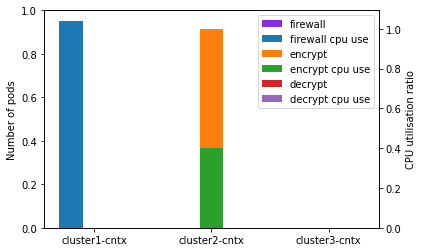

In [59]:
import matplotlib.pyplot as plt
import numpy as np

labels=[]
firewall=[]
cpu_firewall=[]
encrypt=[]
cpu_encrypt=[]
decrypt=[]
cpu_decrypt=[]

for c in range(len(G)):
    label= list(G.keys())[c]
    labels.append(label)
    for fu in range(len(bf)):
        f= list(bf.keys())[fu]
        if f == "firewall":
            firewall.append( runningPods(label,f))
            for d in range(len(whichConf(label, f))):
                cpu_firewall.append(cpuUtilised(label, f+whichConf(label, f)[0]))
            if len(whichConf(label, f)) == 0:
                   cpu_firewall.append(0)                  
        if f == "encrypt":
            encrypt.append( runningPods(label,f))
            for d in range(len(whichConf(label, f))):
                cpu_encrypt.append(cpuUtilised(label, f+whichConf(label, f)[0]))
            if len(whichConf(label, f)) == 0:
                   cpu_encrypt.append(0)
        if f == "decrypt":
            decrypt.append( runningPods(label,f))
            for d in range(len(whichConf(label, f))):
                cpu_decrypt.append(cpuUtilised(label, f+whichConf(label, f)[0])) 
            if len(whichConf(label, f)) == 0:
                   cpu_decrypt.append(0)


x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
#fig, (ax, ax2) = plt.subplots(1,1) 
fig, ax = plt.subplots()
ax2 = ax.twinx()

plt.bar(x - 0.2, firewall, width, color="blueviolet", label='firewall')
plt.bar(x - 0.2, cpu_firewall, width, label='firewall cpu use')
plt.bar(x , encrypt, width, label='encrypt')
plt.bar(x , cpu_encrypt, width, label='encrypt cpu use')
plt.bar(x + 0.2, decrypt, width, label='decrypt')
plt.bar(x + 0.2, cpu_decrypt, width, label='decrypt cpu use')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of pods')
#ax.set_title('Scores by group and gender')
plt.xticks(x, labels)
ax2.set_ylabel('CPU utilisation ratio')
#ax2.set_ylim(0, 1.5)
plt.legend()
ax2.plot([],[])

#fig.tight_layout()

plt.show()